In [2]:
from agents.robot_dataset import RobotDataset
from data_analyzer import DataAnalyzer
subj_data = RobotDataset()

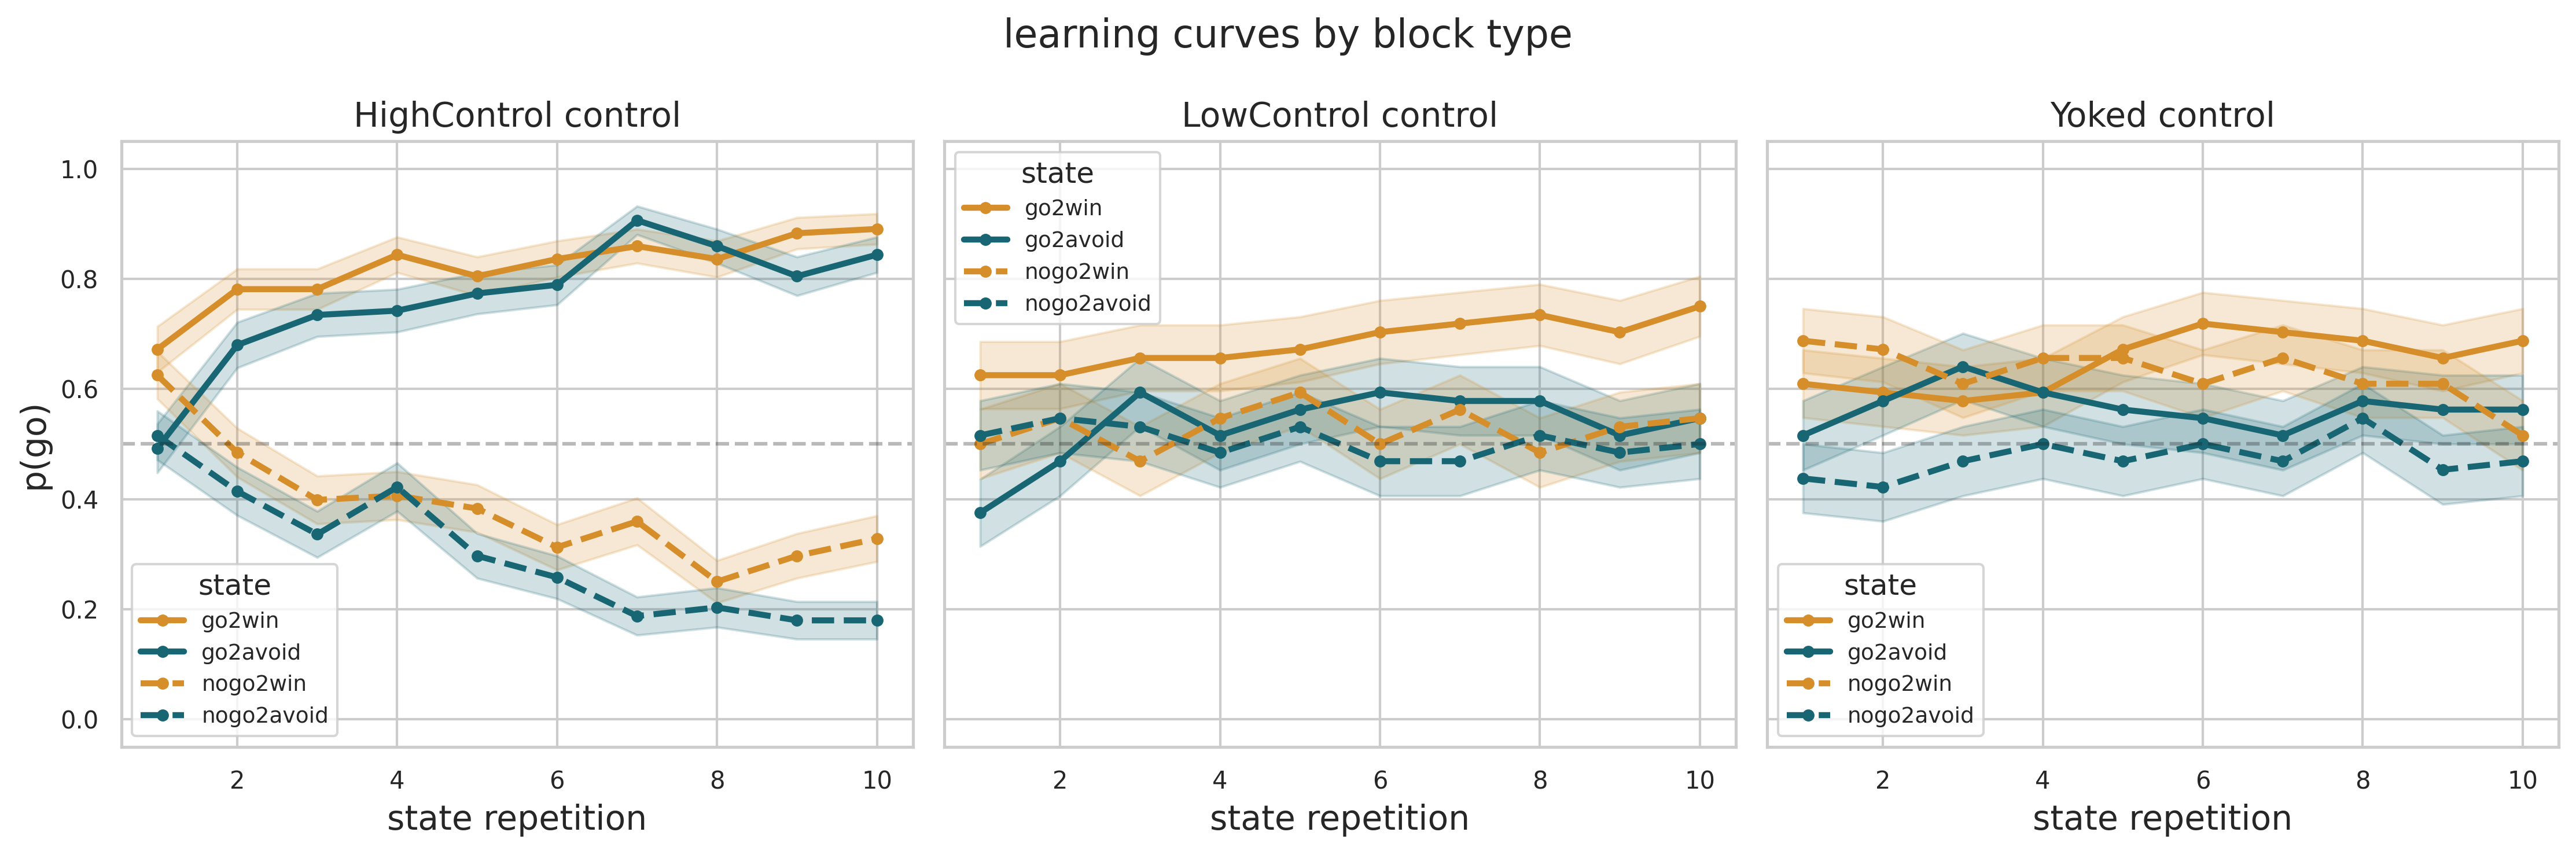

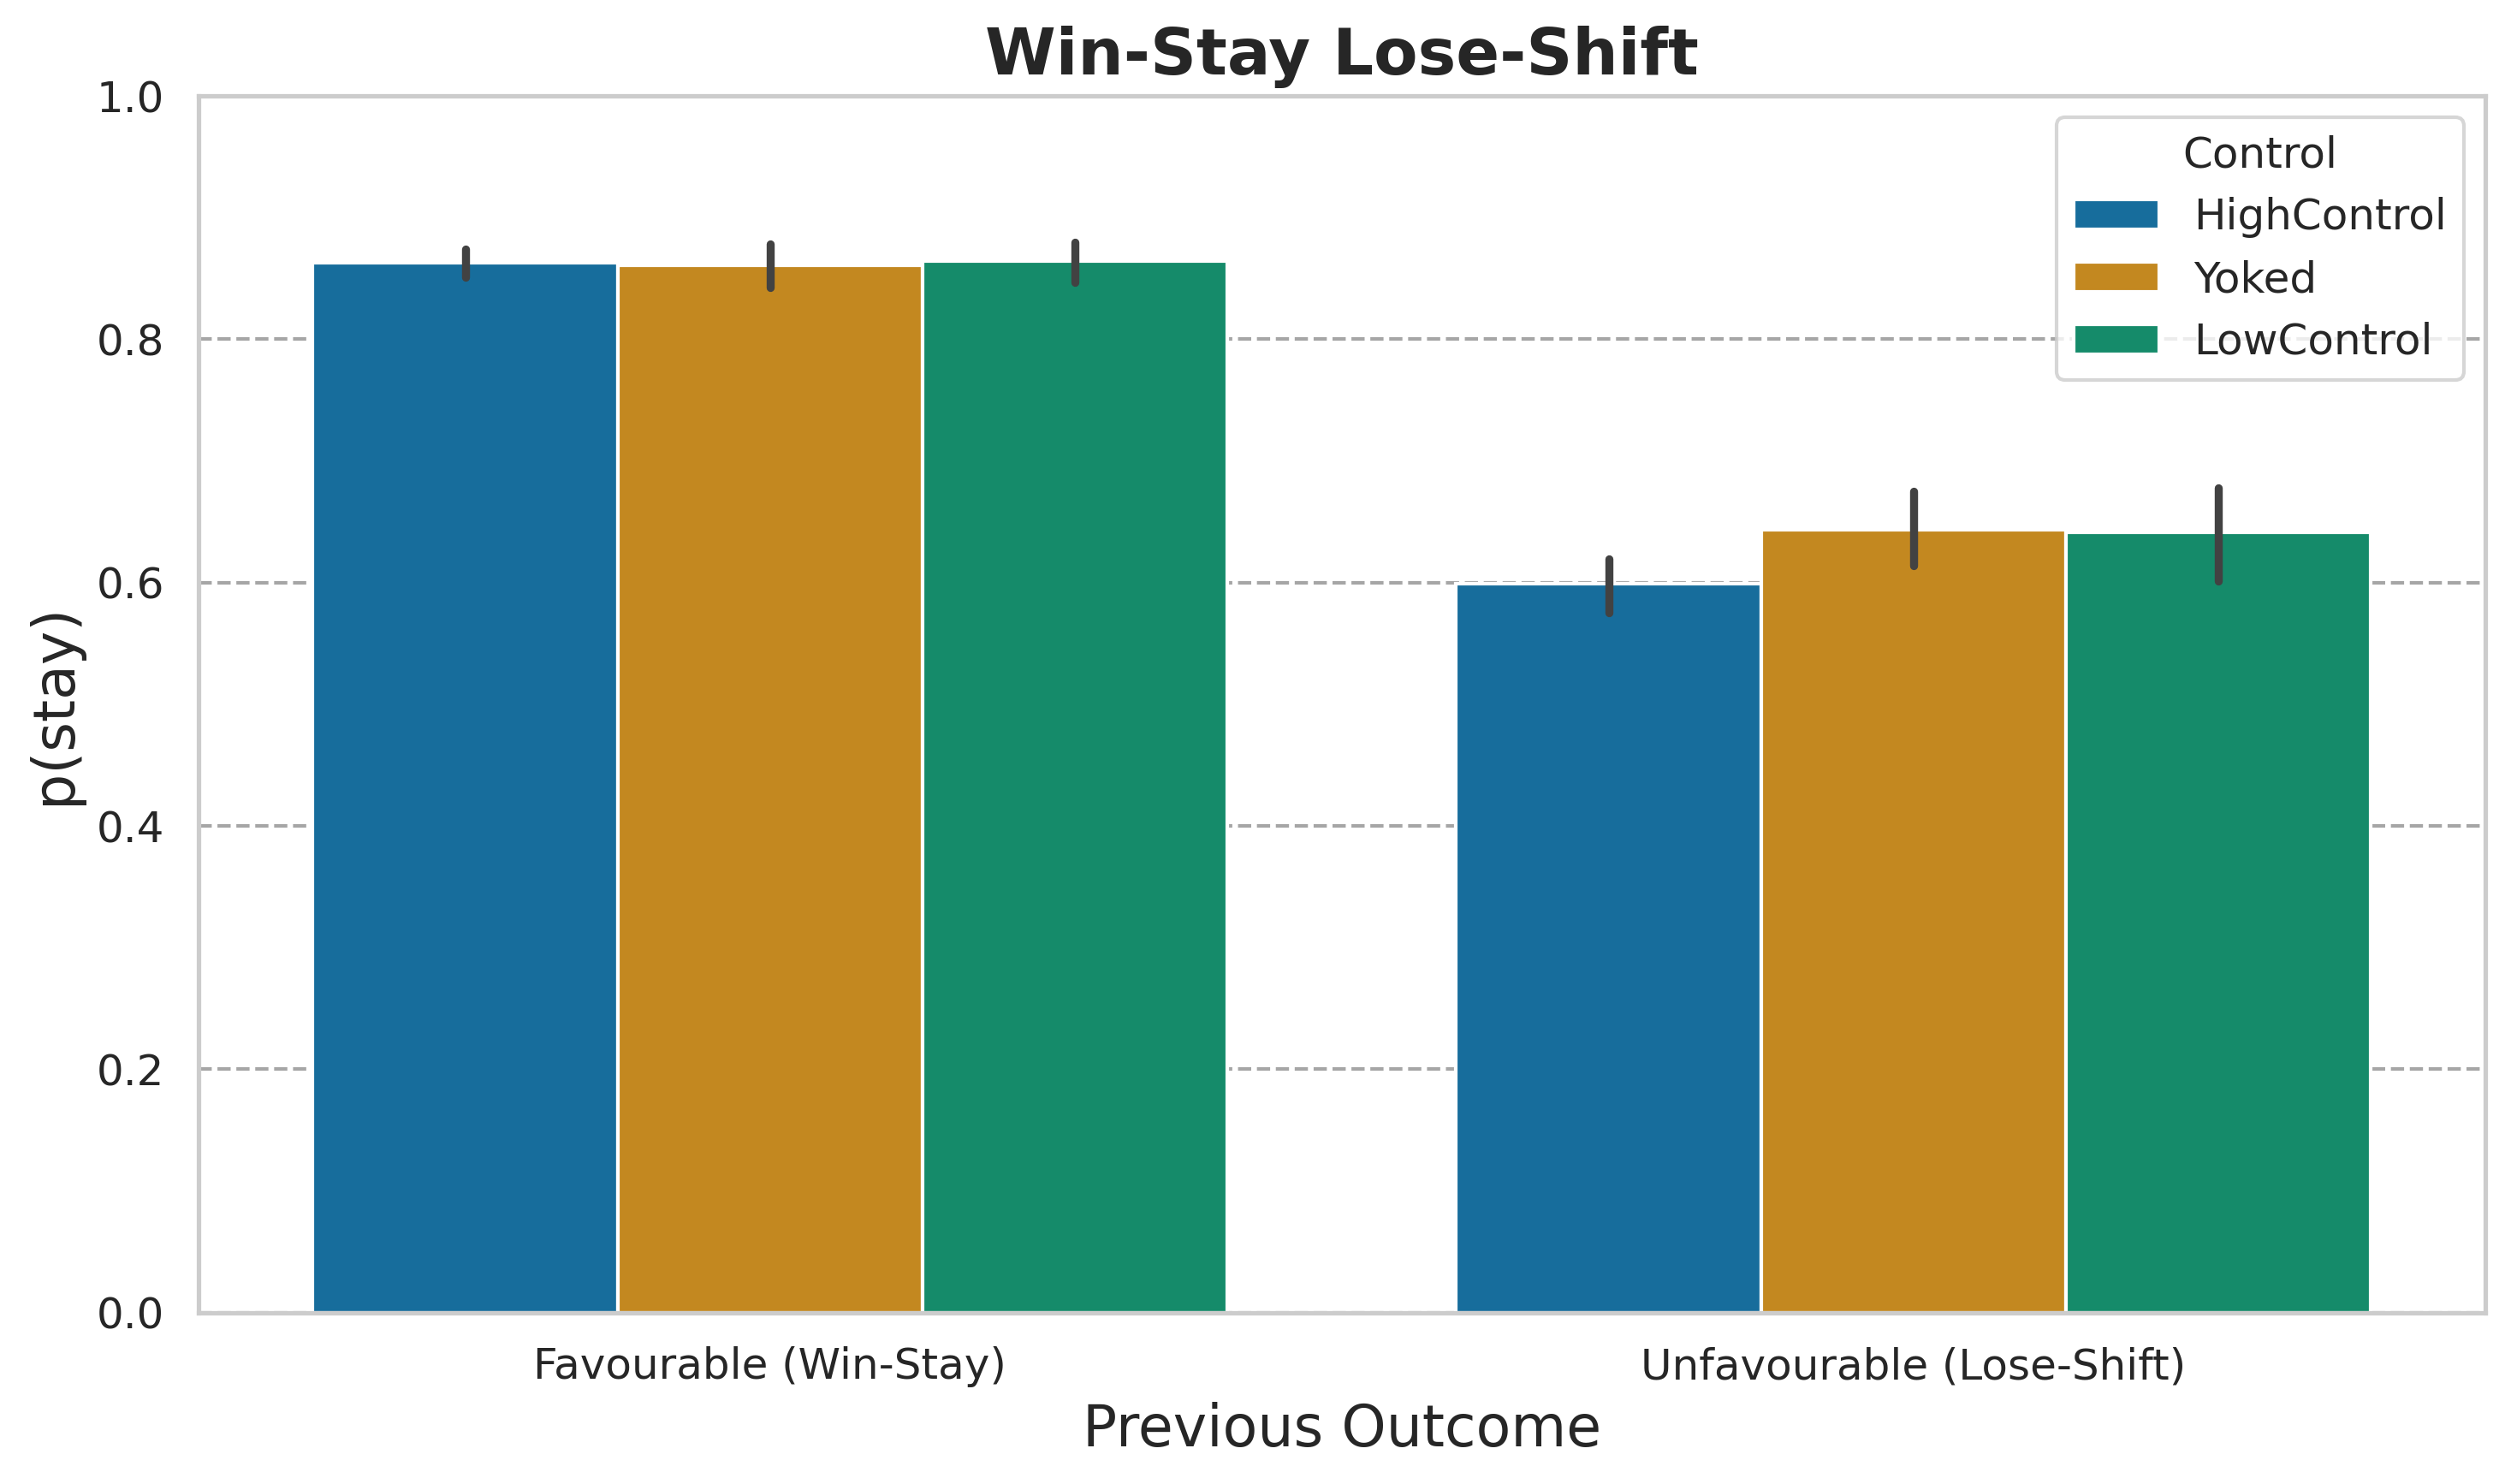

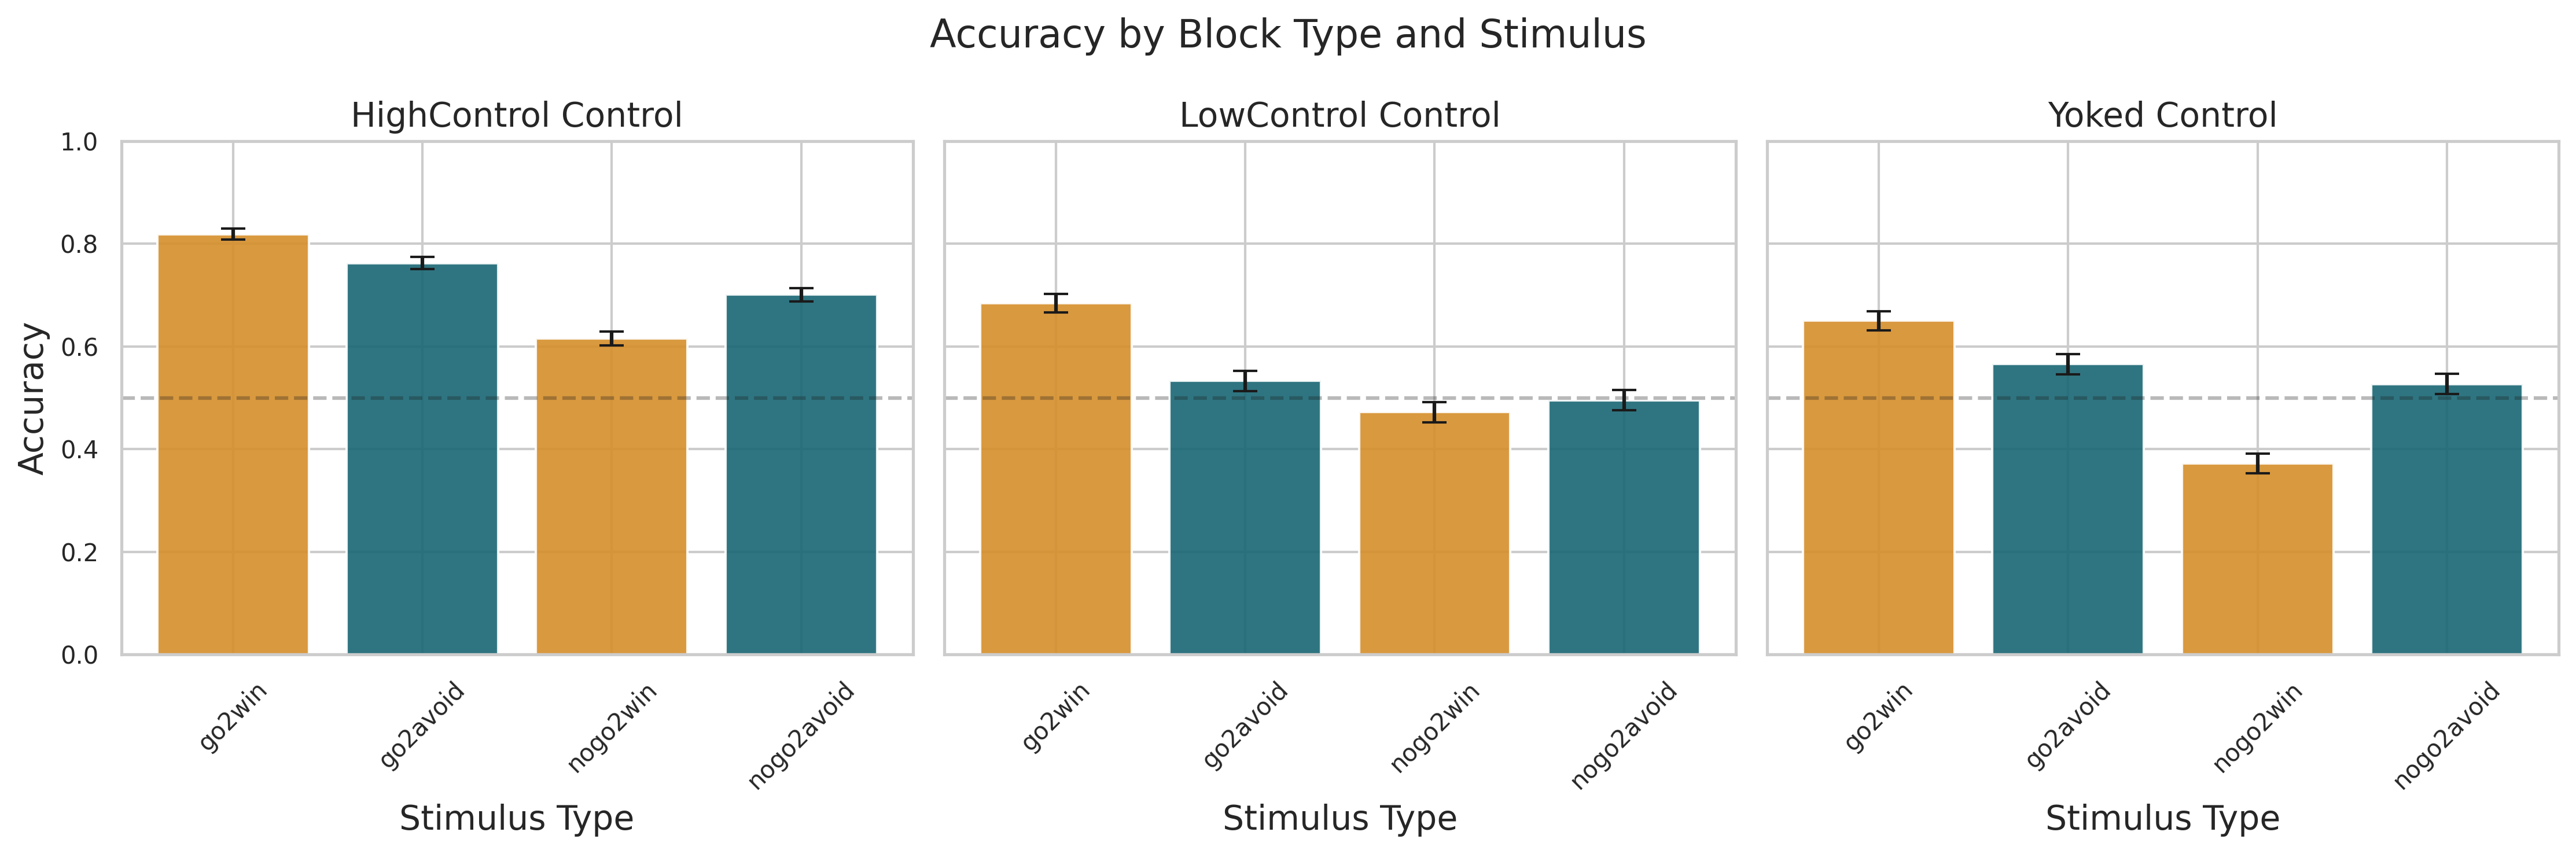

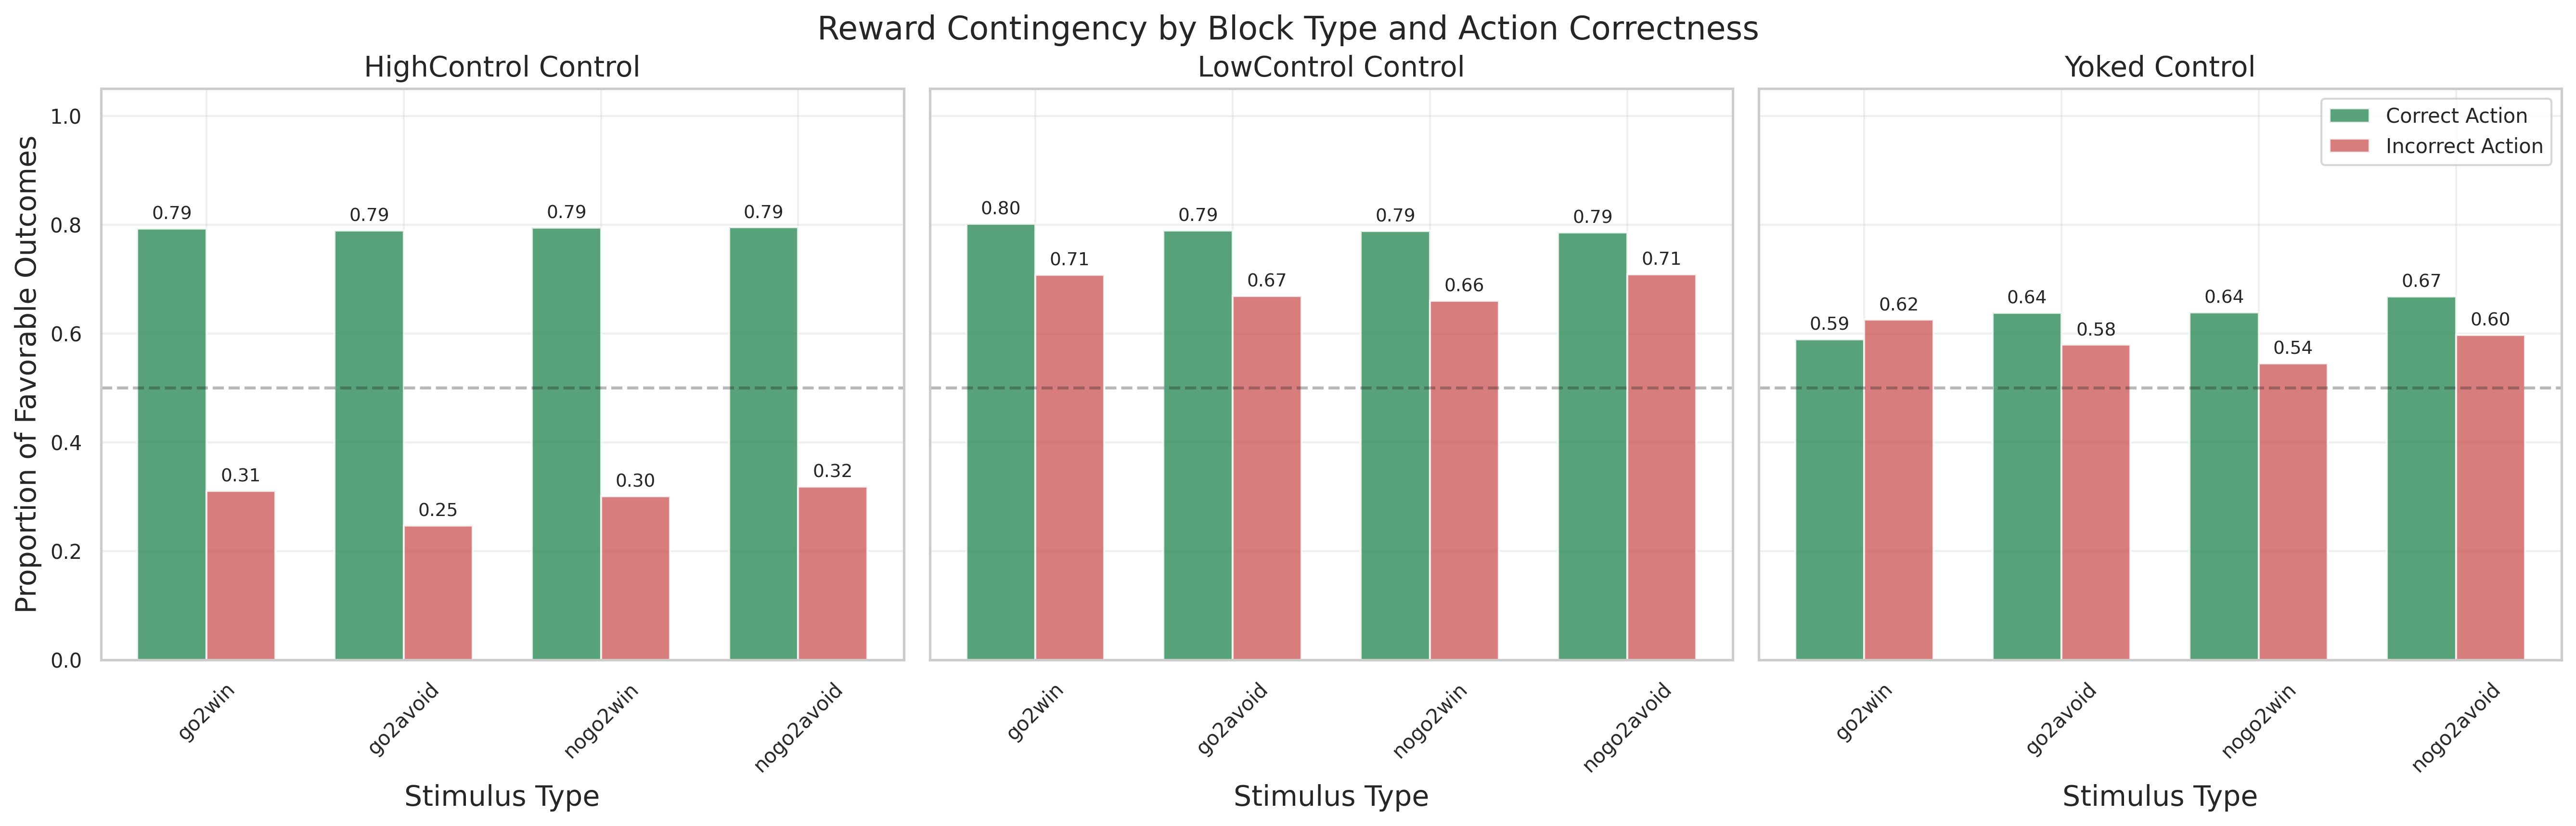

In [3]:
subj_analyzer = DataAnalyzer(is_subject_data=True, raw_data=subj_data.data)
subj_analyzer.plot_learning_curves()
subj_analyzer.plot_wsls(debug=False)
subj_analyzer.plot_accuracy()
subj_analyzer.plot_reward_contingency()

=== Creating Simulated Data for Comparison ===
Running simulations...
Running 50 simulations for rw...
Running 50 simulations for rw_noise...
Running 50 simulations for rw_noise_bias...
Running 50 simulations for rw_noise_bias_pav_dynamic...
Running 50 simulations for rw_noise_bias_asym_reward...
Running 50 simulations for rw_noise_bias_pav_dynamic_asym_decay_both...
Generated 18000 simulated trials

=== Comparing Subject vs Simulation Data ===


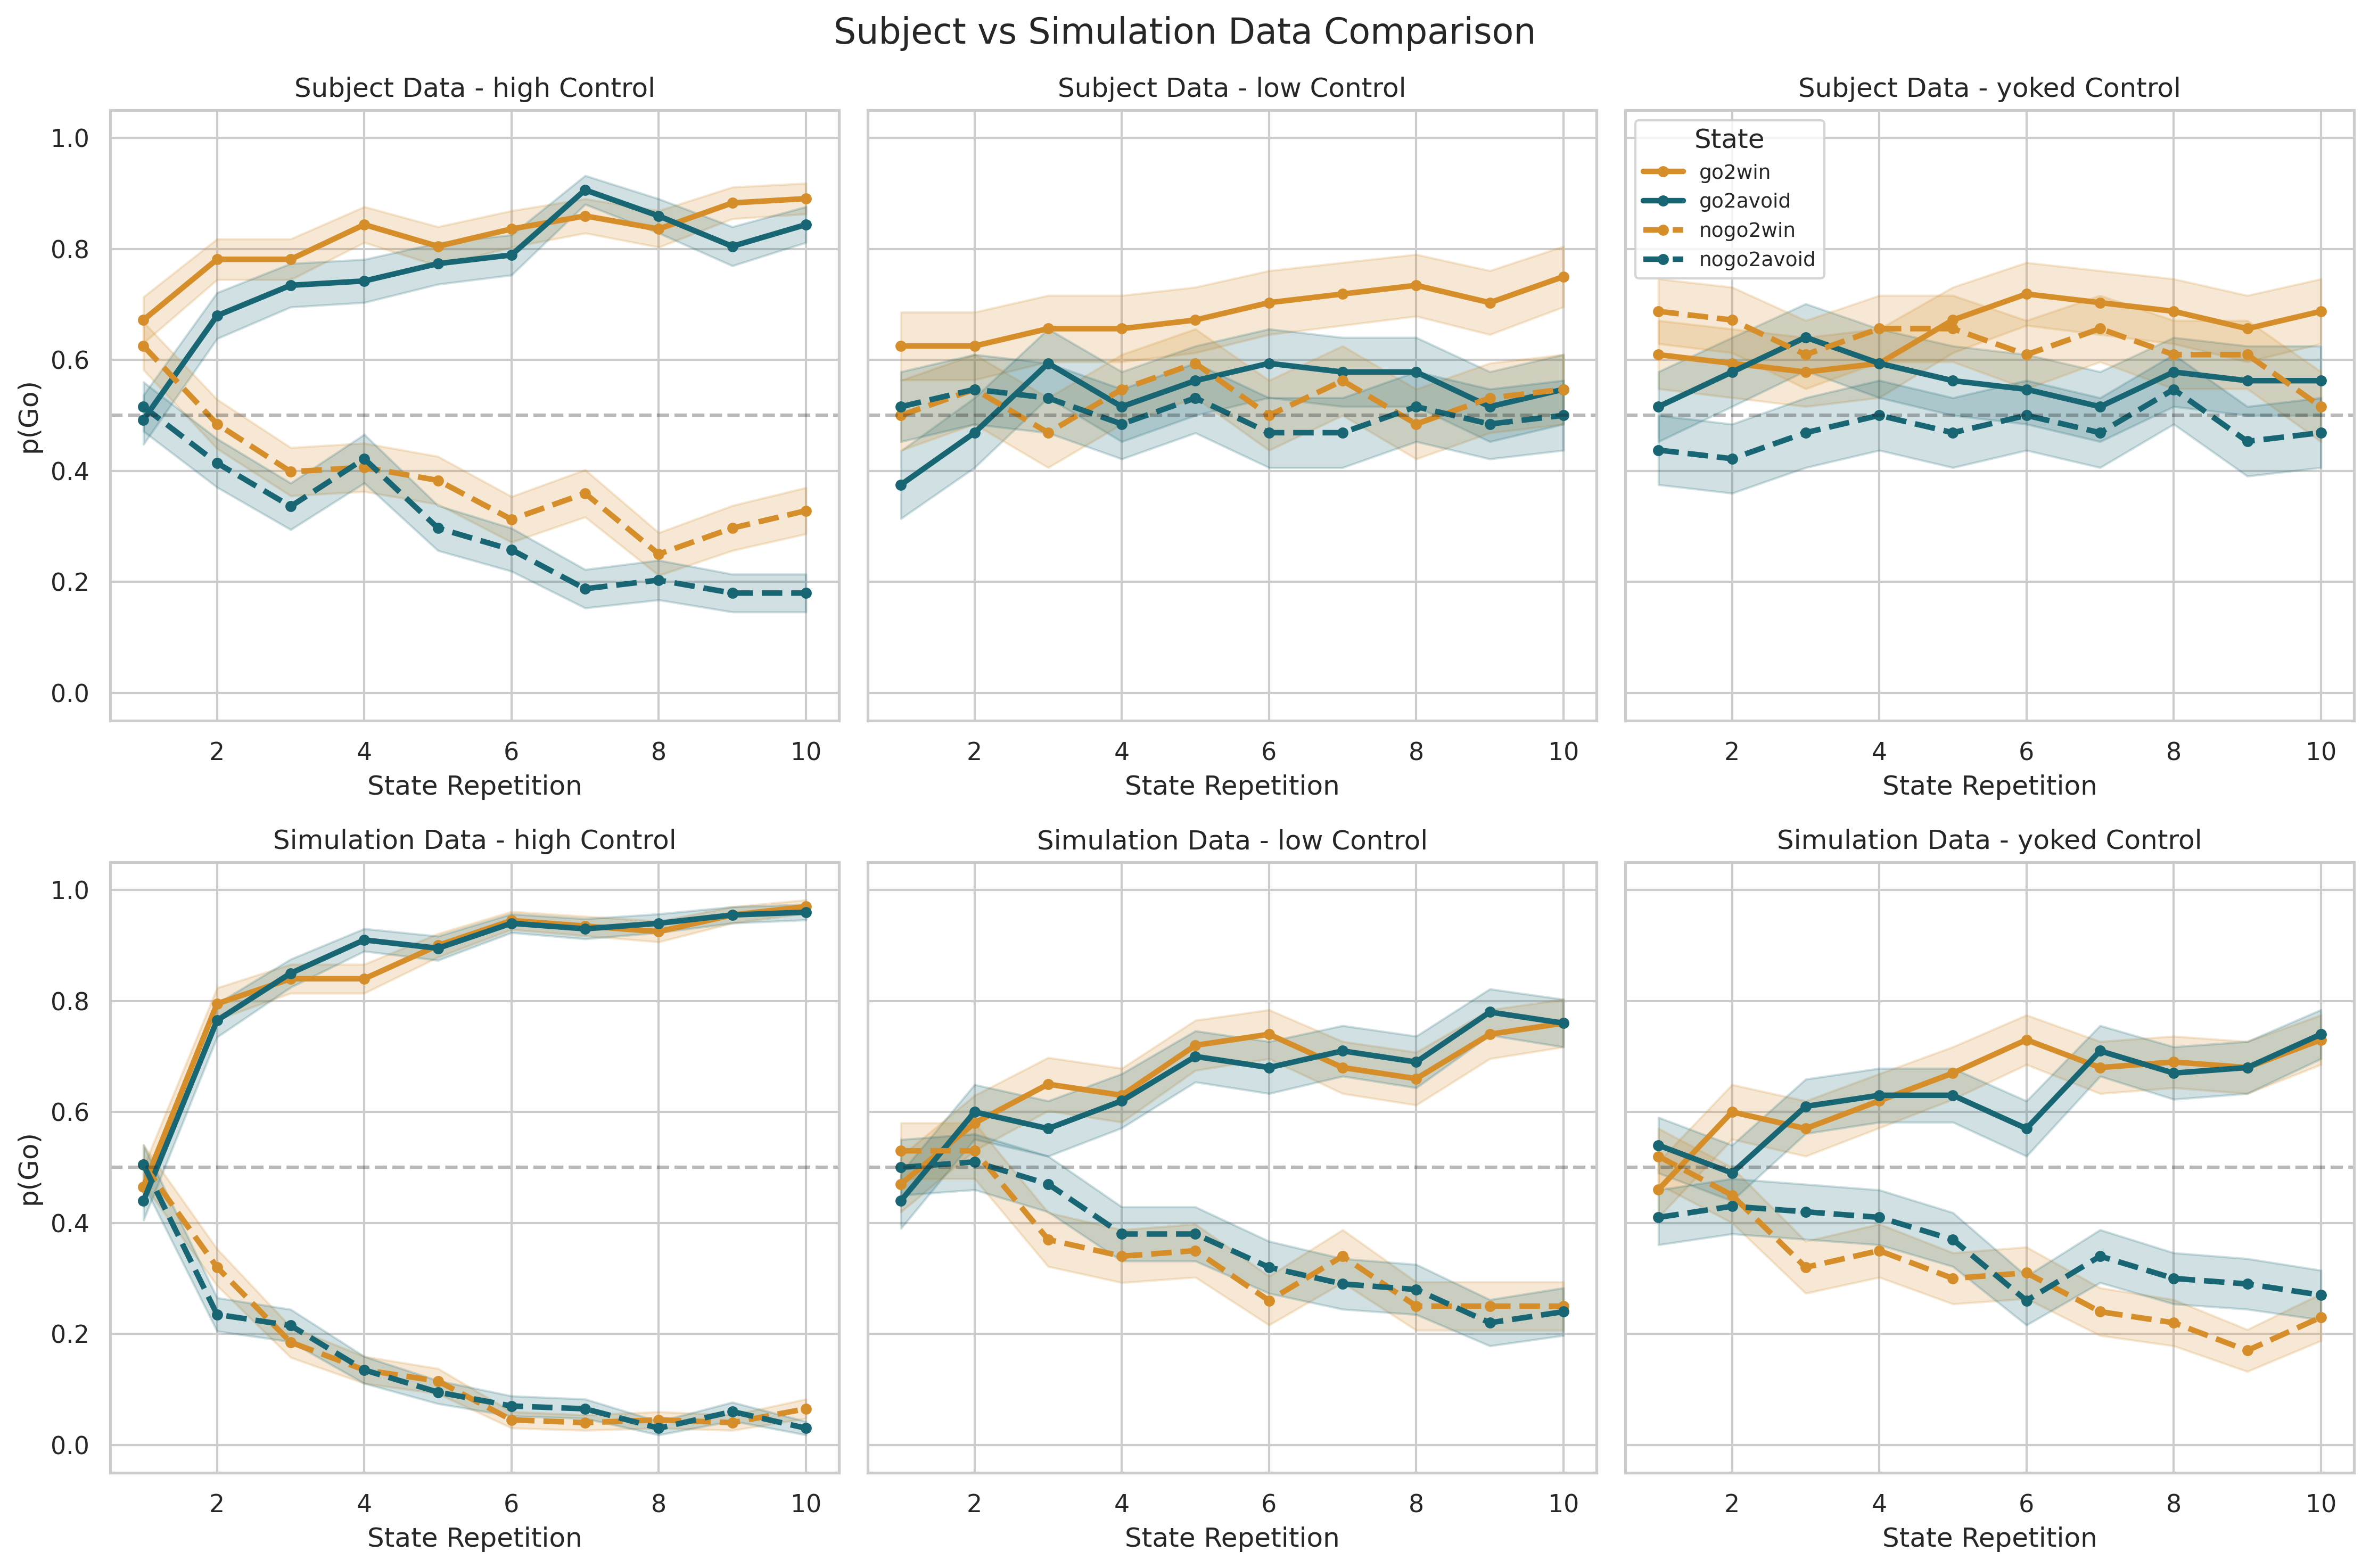

In [ ]:
# Create simulated data and compare to subject data
import numpy as np
from envs.GoNoGoEnv import GoNoGoEnv, GoNoGoConfig
from agents.rw_agent import RWAgent, RWConfig
from simulation_analysis import SimulationRunner, compare_agents
from agents.agents_configs import get_models_for_fitting

print("=== Creating Simulated Data for Comparison ===")

# Setup Environment (similar to run_simulation.py)
env_config = GoNoGoConfig(
    n_blocks=8,
    add_calibration=True,
    n_states=4,
    c_schedule_idx=4
)
env = GoNoGoEnv(config=env_config)

# Get a simple RW model for simulation
np.random.seed(42)  # For reproducible results
configs = get_models_for_fitting(include_names=['rw'], exclude_names=['rlwm', 'collins'])

# Run simulations to create comparison data
print("Running simulations...")
comparison_results = compare_agents(
    configs,  # Just use the first (simplest) model
    env,
    n_simulations=50  # Smaller number for faster testing
)

# Get the simulated data
sim_data = list(comparison_results.values())[0]['combined_data']
print(f"Generated {len(sim_data)} simulated trials")

# Compare subject data vs simulation data
print("\n=== Comparing Subject vs Simulation Data ===")
DataAnalyzer.compare_datasets(
    subject_data=subj_data.data,
    simulation_data=sim_data,
    save_path=None  # Set to a path if   want to save the plot
)

In [13]:
comparison_results['rw']['combined_data']['agent_seed']

0        17270
1        17270
2        17270
3        17270
4        17270
         ...  
17995    17099
17996    17099
17997    17099
17998    17099
17999    17099
Name: agent_seed, Length: 18000, dtype: int64

In [16]:
comparison_results['rw_noise_bias']['combined_data']['agent_seed']

0        33099
1        33099
2        33099
3        33099
4        33099
         ...  
17995    35450
17996    35450
17997    35450
17998    35450
17999    35450
Name: agent_seed, Length: 18000, dtype: int64